In [17]:
import GOES

In [ ]:
GOES.download('goes19', 'ABI-L2-CMIPF',
             DateTimeIni='20260123-000000', DateTimeFin='20260123-001000', 
            channel=['13'], path_out=r'D:\sinop\\'
            rename_fmt = '%Y%m%d%H%M')

In [1]:
pip install custom_color_palette

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
#Oeste, Este, Sur, Norte
ds= GOES.open_dataset(r"D:\sinopOR_ABI-L2-CMIPF-M6C13_G19_s20260230000206_e20260230009526_c20260230009578.nc")
domain = [-120, 10, -70, 20]

# 2. Extraer los datos (Aquí es donde se recorta el archivo .nc)
CMI, LonCen, LatCen = ds.image('CMI', lonlat='center', domain=domain)
LonCor, LatCor = GOES.calculate_corners(LonCen, LatCen)

In [20]:
sat = ds.attribute('platform_ID')
band = ds.variable('band_id').data[0]
wl = ds.variable('band_wavelength').data[0]

In [21]:
# import packages
import custom_color_palette as ccp
import matplotlib.pyplot as plt

# set the colors of the custom palette
lower_colors = ['maroon','red','darkorange','#ffff00','forestgreen','cyan','royalblue',(148/255,0/255,211/255)]
lower_palette = [lower_colors, ccp.range(180.0,240.0,1.0)]

upper_colors = plt.cm.Greys
upper_palette = [upper_colors, ccp.range(240.0,330.0,1.0), [ccp.range(180.0,330.0,1.0),240.0,330.0]]

# pass parameters to the creates_palette module
cmap, cmticks, norm, bounds = ccp.creates_palette([lower_palette, upper_palette], extend='both')

# creating colorbar labels
ticks = ccp.range(180,330,10)

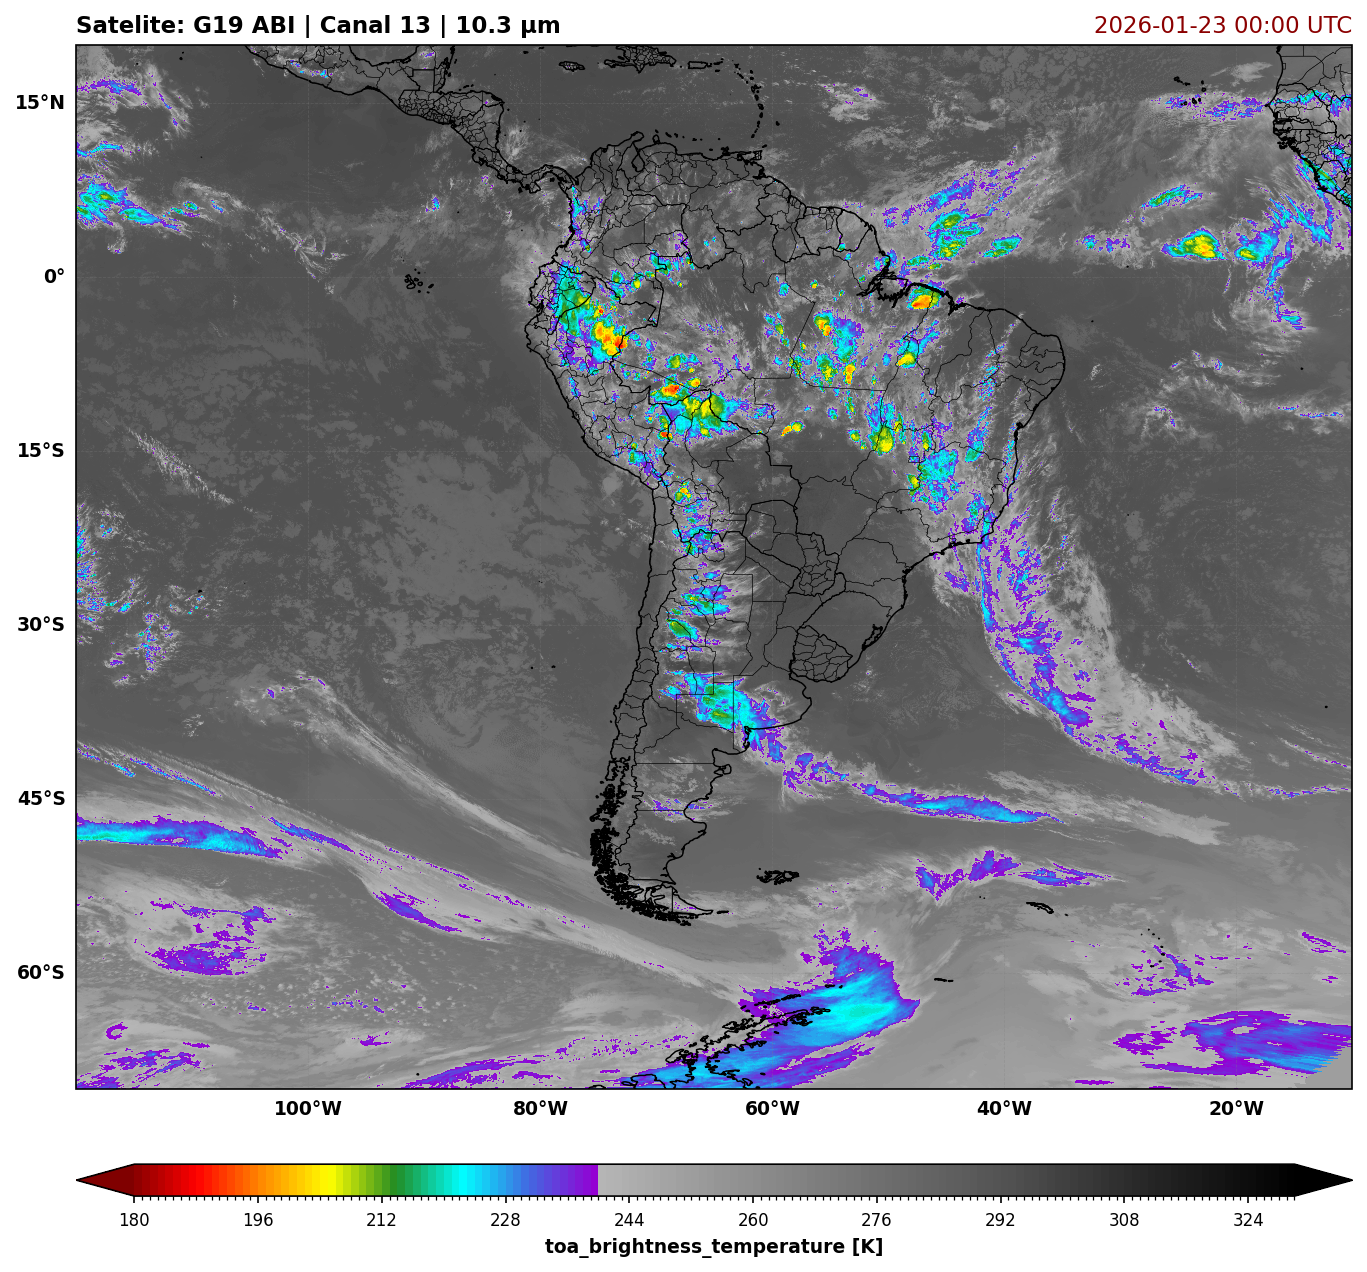

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter

# --- 1. Configuración de Calidad Superior ---
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'

# El dominio que definiste
domain = [-120, -10, -70, 20]

# --- 2. Creación de la Figura ---
fig = plt.figure(figsize=(9, 11), constrained_layout=True)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# --- 3. Capas Geográficas "Ultra-Detailed" (10m) ---
ax.add_feature(cfeature.LAND, facecolor='#fdfdfd')
ax.add_feature(cfeature.OCEAN, facecolor='#eef2ff')

# Añadimos las capas con alta resolución
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=0.7, edgecolor='black')
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=0.5, edgecolor="#000000")
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.2, edgecolor='#000000')

# --- 4. Trazado de Datos (Solución al error de dimensiones) ---
# Usamos LonCen y LatCen con shading='nearest' para evitar el conflicto de dimensiones
# Si prefieres 'gouraud', pcolormesh requiere que LonCor/LatCor sean exactos.
# La opción más segura y nítida en Cartopy es:
img = ax.pcolormesh(LonCen.data, LatCen.data, CMI.data, 
                    cmap=cmap, norm=norm, 
                    transform=ccrs.PlateCarree(),
                    shading='auto', # 'auto' elige la mejor opción según las dimensiones
                    rasterized=True)

# --- 5. Configuración de Ejes y Grilla ---
ax.set_extent(domain, crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.4, color='gray', alpha=0.3, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size': 9, 'weight': 'bold'}
gl.ylabel_style = {'size': 9, 'weight': 'bold'}

# Forzamos los ticks para que no se amontonen
gl.xlocator = mticker.MaxNLocator(nbins=6)
gl.ylocator = mticker.MaxNLocator(nbins=8)

# --- 6. Colorbar Elegante ---
cb = fig.colorbar(img, orientation='horizontal', pad=0.03, fraction=0.04, aspect=40, extend='both')
cb.ax.tick_params(labelsize=8)
cb.set_label(label=f'{CMI.standard_name} [{CMI.units}]', size=9, weight='bold')

# --- 7. Títulos ---
ax.set_title(f'Satelite: {sat} ABI | Canal {band:02d} | {wl:.1f} μm', 
             loc='left', fontsize=11, fontweight='bold')
ax.set_title(CMI.time_bounds.data[0].strftime('%Y-%m-%d %H:%M UTC'), 
             loc='right', fontsize=11, color='darkred')

plt.show()